# Convert EWX .json file to dataframe (or .csv)

### To Do: 
1. calculate heartbeat (length b/t time intervals) for every pred. year
2. get length of yearly forecasts (to confirm hourly intervals)

### Import libraries

In [7]:
%matplotlib notebook
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import json
import os
os.getcwd()

'C:\\Users\\wb5888\\Documents\\EWX'

### Find downloaded .json file

In [5]:
filepath = 'C:\\Users\\wb5888\\Documents\\EWX'

def sortdir(filepath, num):
    os.chdir(filepath)
    files = np.array(os.listdir())
    time = []
    for file in files:
        sys_time = round(os.path.getmtime(filepath + "\\" + file))
        time.append(datetime.fromtimestamp(sys_time))

    time = np.array(time)
    lab = ['files']
    filedf = pd.DataFrame(files, columns = lab)

    filedf['time'] = time
    filedf = filedf.sort_values(by = 'time', axis = 0, ascending = False).reset_index(drop = True)

    print("files found in dir: ", filepath)
    print(filedf.head(num))
    return(filedf.head(num))

In [8]:
filedf = sortdir(filepath, 5)

files found in dir:  C:\Users\wb5888\Documents\EWX
                                               files                time
0  20190515141600626000_NEPOOL_CLP_51984022020_86... 2019-05-15 15:06:46
1                         NEPOOL_MECO_0188301000.csv 2019-05-13 08:00:10
2   20190507084716849000_NEPOOL_MECO_0188301000.json 2019-05-13 07:58:15
3                         NEPOOL_MECO_8789195006.csv 2019-05-10 16:15:43
4                         NEPOOL_MECO_2781585002.csv 2019-05-10 15:59:35


### Parse .json, save time & forecast values to dataframe

In [9]:
forecasts = json_parse_csv(filedf.files[0])
#forecasts2 = json_parse_csv(filedf.files[1])

loading json...


IndexError: list index out of range

In [8]:
def json_parse_csv(file):
    
    with open(file) as raw:
        print("loading json...")
        data = json.load(raw) #raw json file
        acct = data['account'] #get account data
        ch3 = acct['timeseriesdataidr'] #dictionary of acct attributes
        n = len(ch3)
        
        reads = ch3[0]['reads']
        master_df = pd.DataFrame.from_dict(reads)
        
        print('found ', n, 'reads, creating dataset.')
        
        for i in range(1,n):
            reads = ch3[i]['reads']
            temp = pd.DataFrame.from_dict(reads)
            master_df = pd.concat([master_df, temp]).reset_index(drop = True)
        
        print(master_df.head())
        print(master_df.tail())
        
    
        print("saving to dataframe...")
    
    filename = file.split('_')[1:]
    filename = '_'.join(filename)
    filename = filename.replace('.json', '.csv')

    print('writing file to csv')
    master_df.to_csv(filename, sep = ",", header = True, index = False)
    return(master_df)

### Plot data

<IPython.core.display.Javascript object>


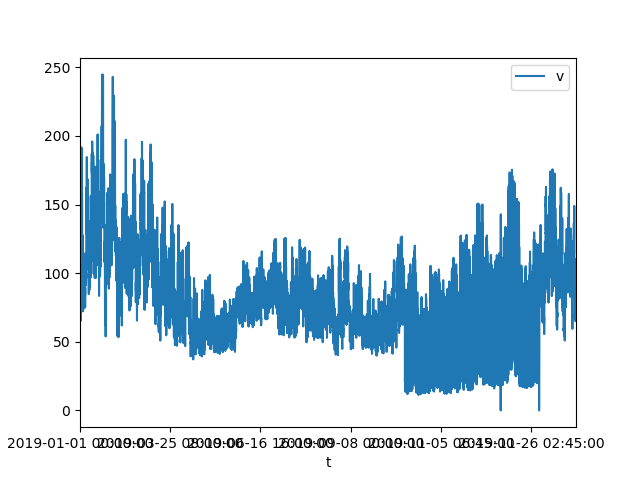

In [40]:
year = [int(string.split('-')[0]) for string in forecasts.t]
year_ind = [(date < 2020) for date in year]
forecasts.iloc[0:sum(year_ind),:] .plot(x = 't', y = 'v')

<IPython.core.display.Javascript object>


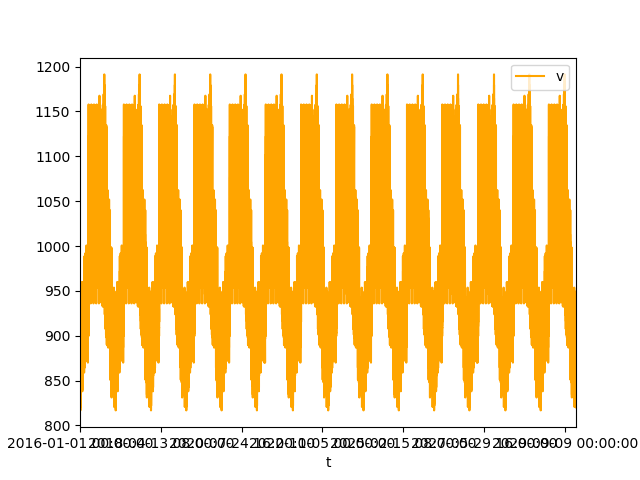

In [8]:
forecasts2.plot(x = 't', y = 'v', color = 'orange')

In [48]:
os.getcwd()
output = sortdir(filepath, 20)

files found in dir:  C:\Users\wb5888\Documents\EWX
                                                files                time
0                          NEPOOL_MECO_3881122008.csv 2019-05-10 13:36:43
1                          NEPOOL_MECO_2781585002.csv 2019-05-10 13:36:43
2    20190510123605186000_NEPOOL_MECO_3881122008.json 2019-05-10 13:35:58
3    20190510123105534000_NEPOOL_MECO_2781585002.json 2019-05-10 13:35:29
4                          NEPOOL_MECO_8789195006.csv 2019-05-10 13:29:16
5    20190510123105331000_NEPOOL_MECO_8789195006.json 2019-05-10 13:24:46
6                NEPOOL_CLP_51901234096_250782007.csv 2019-05-10 08:14:26
7                NEPOOL_CLP_51810207001_700653005.csv 2019-05-10 08:14:22
8                              NEPOOL_CLP_51810207001 2019-05-10 07:58:51
9                              NEPOOL_CLP_51901234096 2019-05-10 07:58:50
10  20190509110103732000_NEPOOL_CLP_51901234096_25... 2019-05-10 07:56:54
11  20190509110103467000_NEPOOL_CLP_51810207001_70... 2019-05

In [50]:
output.files[1]

'NEPOOL_MECO_2781585002.csv'

In [53]:
output.files[4]

'NEPOOL_MECO_8789195006.csv'